In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [ ]:
import pandas as pd
df=pd.read_csv("Bengaluru_House_Data.csv")

In [ ]:
print("\nfirst 5 rows:")
print(df.head())
print("\nlast 5 rows:")
print(df.tail())
print("\nshape of the dataset:")
print(df.shape)
print("\nInfo:")
print(df.info())
print("\nData types of all columns:")
print(df.dtypes)


first 5 rows:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

last 5 rows:
                  area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Ri

In [ ]:
print("Null values")
print(df.isnull())
print("\nTotal null values")
print(df.isnull().sum())
print("\nTotal null values in dataset")
print(df.isnull().sum().sum())

Null values
       area_type  availability  location   size  society  total_sqft   bath  \
0          False         False     False  False    False       False  False   
1          False         False     False  False    False       False  False   
2          False         False     False  False     True       False  False   
3          False         False     False  False    False       False  False   
4          False         False     False  False     True       False  False   
...          ...           ...       ...    ...      ...         ...    ...   
13315      False         False     False  False    False       False  False   
13316      False         False     False  False     True       False  False   
13317      False         False     False  False    False       False  False   
13318      False         False     False  False    False       False  False   
13319      False         False     False  False     True       False  False   

       balcony  price  
0        False 

In [ ]:
# Drop 'society'
df=df.drop(columns=['society'], errors='ignore')
# Drop all unnamed columns
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
#Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
df['balcony']=df['balcony'].fillna(0)
df['bath']=df['bath'].fillna(0)
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
12701,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
12702,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
12703,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,0.0,400.00
12704,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [ ]:
#Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
def sqft_to_num(x):
    if '-' in x:
        a, b = x.split('-')
        return (float(a) + float(b)) / 2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].astype(str).apply(sqft_to_num)
df
#Remove duplicate rows.
df.drop_duplicates(inplace=True)
#Reset the DataFrame index after cleaning
df.reset_index(drop=True,inplace=True)

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [ ]:
#how many unique locations are present in dataset
print("Unique locations:", df['location'].unique())
print("Number of unique locations:", df['location'].nunique())

#average house price for each location
print("\nAverage house price for each location:")
print(df.groupby('location')['price'].mean())

#which location has highest average price
print("\nLocation with highest average price")
print(df.groupby('location')['price'].mean().idxmax(),"-",df.groupby('location')['price'].mean().max())

#what is correlation between total_sqft,bath,price
print("\nCorrelation between total_sqft,bath,price")
print(df[['total_sqft', 'bath', 'price']].corr())

#interpret whether larger gouse always have higher prices on your observations
print("\nLarger houses usually have higher prices (total_sqft vs price correlation = 0.57),")
print("But not always, as location and other factors also affect price.")


Unique locations: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
Number of unique locations: 1299

Average house price for each location:
location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Bhoganhalli             22.890000
 Devarabeesana Halli    124.833333
                           ...    
t.c palya               160.000000
tc.palya                 60.750000
vinayakanagar           200.000000
white field,kadugodi    275.000000
whitefiled               32.730000
Name: price, Length: 1299, dtype: float64

Location with highest average price
Cubbon Road - 1900.0

Correlation between total_sqft,bath,price
            total_sqft      bath     price
total_sqft    1.000000  0.376198  0.573858
bath          0.376198  1.000000  0.444151
price         0.573858  0.444151  1.000000

Larger houses usually have higher prices (tot

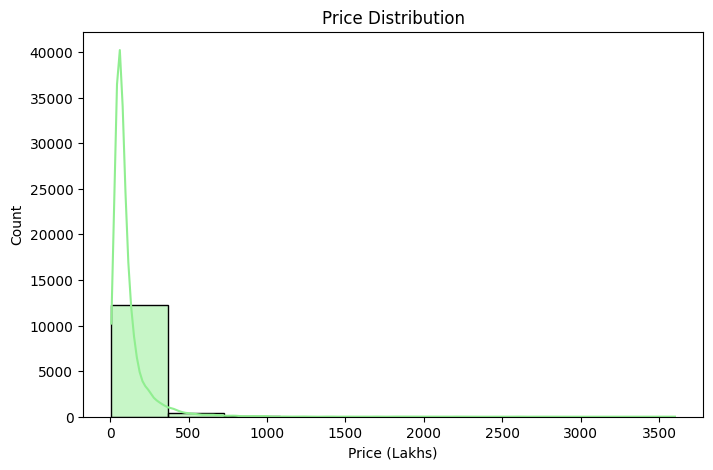

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Data Visualization
#1.Price Distribution
#Plot the distribution of the price column using a Histogram + KDE curve.
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=10, kde=True, color='lightgreen')  # bins=10 for small sample
plt.title('Price Distribution')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.show()

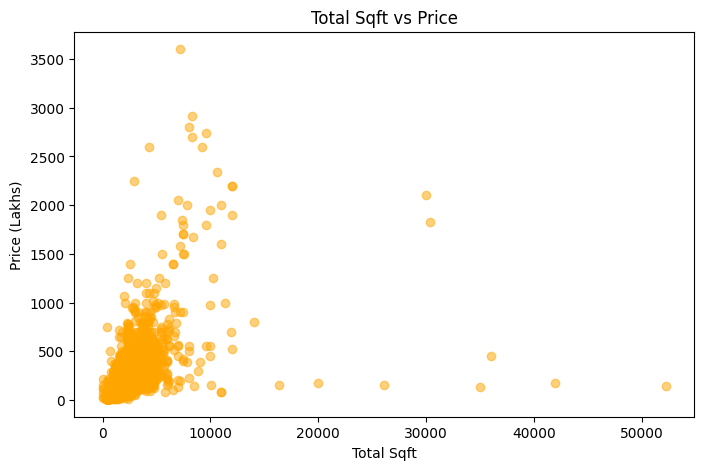

In [ ]:
#2.Relationship Between Area and Price
#Visualize the relationship between total_sqft and price using a Scatter Plot.
plt.figure(figsize=(8,5))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5, color='orange')
plt.title('Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price (Lakhs)')
plt.show()

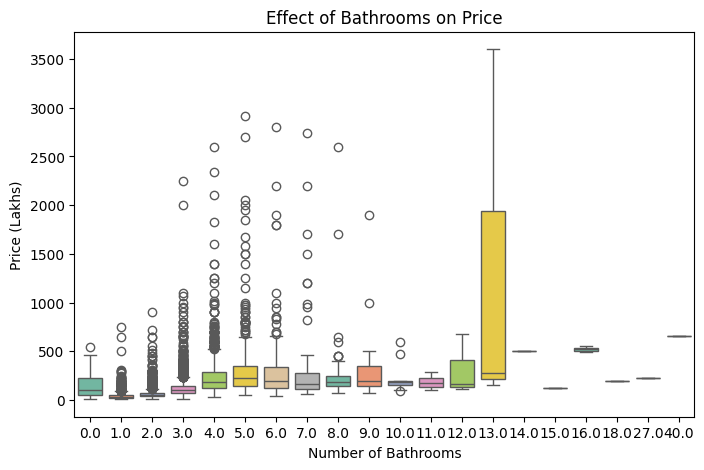

In [ ]:
#3.Effect of Bathrooms on Price
#Show how bath count affects house prices using a Box Plot.
plt.figure(figsize=(8,5))
sns.boxplot(x='bath', y='price', data=df, hue='bath', dodge=False, palette='Set2', legend=False)
plt.title('Effect of Bathrooms on Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Lakhs)')
plt.show()

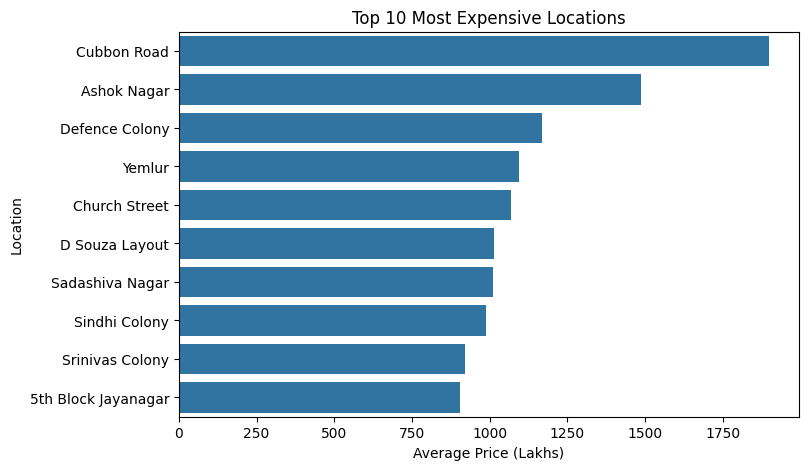

In [ ]:
#4.Top 10 Most Expensive Locations
#Plot the Top 10 locations with highest average price using a Bar Chart.
top10 = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Most Expensive Locations')
plt.xlabel('Average Price (Lakhs)')
plt.ylabel('Location')
plt.show()

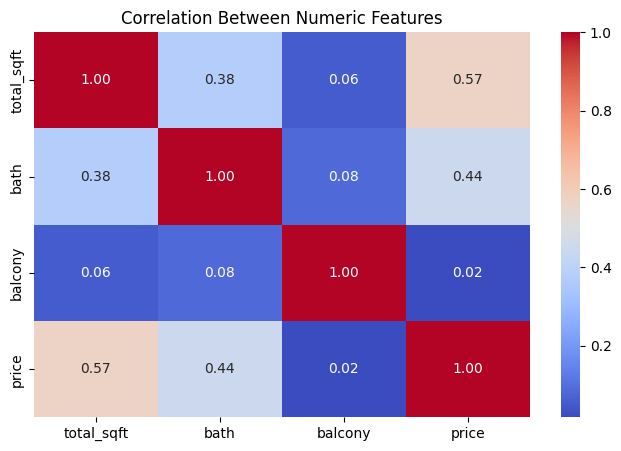

In [ ]:
#5.Correlation Between Numeric Columns
#Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
# Compute correlation matrix
corr = numeric_cols.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()

In [ ]:
# Export to CSV
df.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1=pd.read_csv("cleaned_dataset.csv")
df1.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [ ]:
print("Null values:",df1.isnull().sum().sum())

Null values: 0
